In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statistics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from scipy.stats import norm
from sklearn import utils
plt.style.use("bmh")
plt.style.use("ggplot")

# Factors affecting the flights

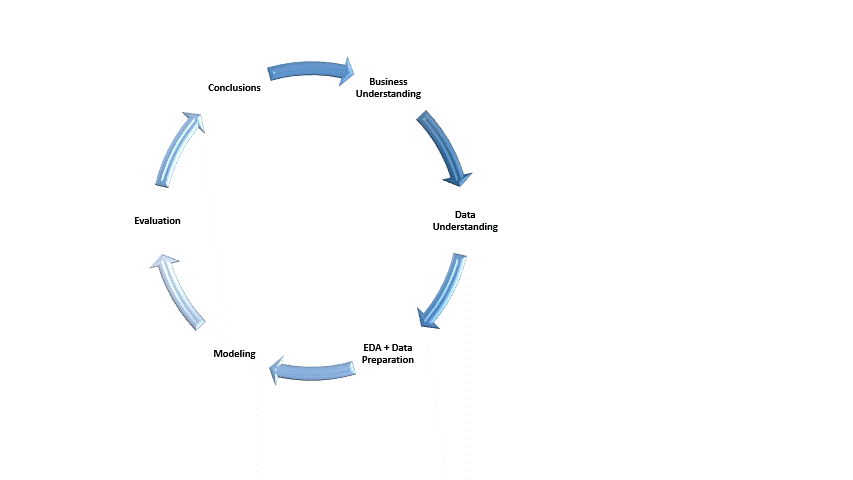

# I. Business Understanding

The Data that provided on domestic flights in India, the information details data on take-off and landing hours, flight routes, various airports, flight price and more.

## Model Crisp-Dm

### question 1:Is it possible to predict or estimate the flight price of a domestic flight in India based on route, airline or date - Supervised Learning

### question 2 - for some flights can be divided into several groups so that in each group there will be flights that are similar to each other in terms of airline, route - Unsupervised Learning

SMART

Specific  - Not a specific question answered in the negative or affirmative, but while giving detailed examples.

Measurable - Measurable data, it is possible to rely on data offered to us in the file of flights.

Assignable Division of labor, Shacharit - data analysis, Ariel - model

Realistic - A question that is behind common sense and can be answered through data analysis

Time-Related – Time division: first week - data analysis, second week - models, third week - data analysis

# II. Data Understanding

In [2]:
try:
  data = pd.read_csv("flights.csv")
  print("The data from the file loaded and ready to be use.")
except:
  print("Error.")

The data from the file loaded and ready to be use.


In [3]:
data

,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,"BLR , DEL",22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.000000
1,Air India,1/05/2019,Kolkata,Banglore,"CCU , IXR , BBI , BLR",05:50,13:15,7h 25m,2 stops,No info,7662.000000
2,Jet Airways,9/06/2019,Delhi,Cochin,"DEL , LKO , BOM , COK",09:25,04:25 10 Jun,19h,2 stops,No info,13882.000000
3,IndiGo,12/05/2019,Kolkata,Banglore,"CCU , NAG , BLR",18:05,23:30,5h 25m,1 stop,No info,6218.000000
4,IndiGo,01/03/2019,Banglore,New Delhi,"BLR , NAG , DEL",16:50,21:35,4h 45m,1 stop,No info,13302.000000
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,"CCU , DEL , BLR",20:30,20:25 07 Jun,23h 55m,1 stop,No info,2457.170366
13350,IndiGo,27/03/2019,Kolkata,Banglore,"CCU , BLR",14:20,16:55,2h 35m,non-stop,No info,2961.059623
13351,Jet Airways,6/03/2019,Delhi,Cochin,"DEL , BOM , COK",21:50,04:25 07 Mar,6h 35m,1 stop,No info,6657.228712
13352,Air India,6/03/2019,Delhi,Cochin,"DEL , BOM , COK",04:00,19:15,15h 15m,1 stop,No info,5454.809453


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date             13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            13354 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


From the info it can be understood that there are no columns with nan, there are 13354 rows on 11 columns

In [5]:
print("There are",data.shape[0],"rows and",data.shape[1],"columns in the file")

There are 13354 rows and 11 columns in the file


In [6]:
data.describe()

,Price
count,13354.000000
mean,8190.637282
std,4648.401101
min,3.065912
25%,4804.000000
50%,7308.000000
75%,11087.000000
max,79512.000000


It can be understood from this that the only numerical figure is the price and therefore we will have to convert them, very poor conclusions
Average price - 8.190 - It is not known what type of price measurement

##### As can be seen from the data presented, most of the data are presented as objects so first we will convert them to numeric numbers in order to compare to other values in the data (information) given 

In [7]:
data['Airline'] = data['Airline'].replace({'Multiple carriers Premium economy': 'Multiple carriers', 'Jet Airways Business': 'Jet Airways', 'Vistara Premium economy': 'Vistara',
                            })
data["Airline"].value_counts()

Jet Airways          4754
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Trujet                  1
Name: Airline, dtype: int64

Handle duplicate values in car Airline:

* Multiple carriers Premium economy and Multiple carriers are same
* Jet Airways Business and Jet Airways are same 
* Vistara and vw are Vistara Premium economy

In [8]:
data['Destination'] = data['Destination'].replace({'New Delhi': 'Delhi'
                            })
data["Destination"].value_counts()

Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [9]:
data["Route"].value_counts()

DEL , BOM , COK                3000
BLR , DEL                      1941
CCU , BOM , BLR                1232
CCU , BLR                       896
BOM , HYD                       785
                               ... 
CCU , IXA , BLR                   1
BOM , JLR , HYD                   1
CCU , IXB , DEL , BLR             1
BLR , HBX , BOM , AMD , DEL       1
BLR , HBX , BOM , NAG , DEL       1
Name: Route, Length: 132, dtype: int64

In [10]:
data["Total_Stops"].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

## EDA

### Statistical research

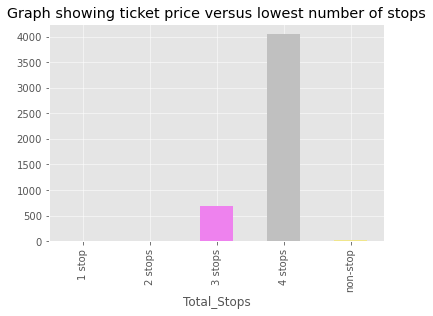

In [11]:
data.groupby("Total_Stops")["Price"].min().plot(kind="bar", color=["pink", "skyblue", "violet", "silver", "khaki","brown","tomato","blueviolet","aqua"],
                                             title="Graph showing ticket price versus lowest number of stops")
plt.show()

According to the graph, it can be analyzed that the lowest number of stops was - 4 stops, and the ticket price was 4,000 rupees

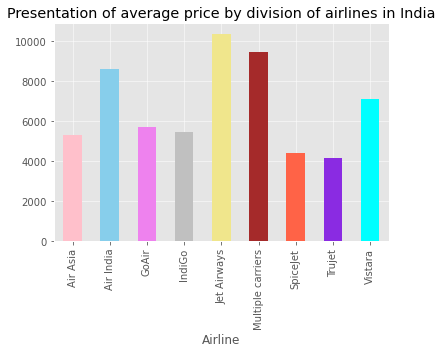

In [12]:
data.groupby("Airline")["Price"].mean().plot(kind="bar", color=["pink", "skyblue", "violet", "silver", "khaki","brown","tomato","blueviolet","aqua"],
                                             title="Presentation of average price by division of airlines in India")
plt.show()

According to the graph it can be analyzed that the average price for the airline is that of Jet Airways

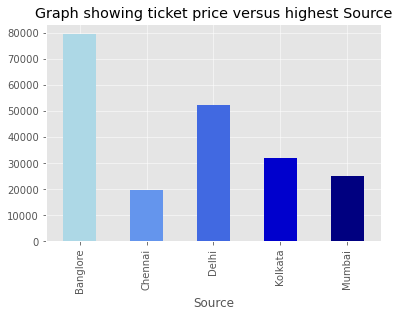

In [13]:
data.groupby("Source")["Price"].max().plot(kind="bar", color=["lightblue","cornflowerblue", "royalblue", "mediumblue","navy"],
                                             title="Graph showing ticket price versus highest Source")
plt.show()

According to the graph it can be analyzed that the ticket price from the highest Source is of Banglore

### Distributions

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

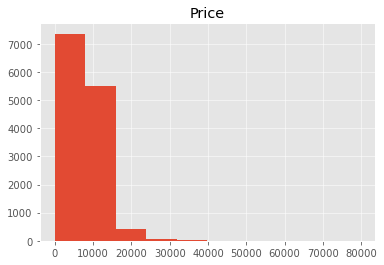

In [14]:
data.hist()

Most flight tickets cost from 0 to 10,000 rupees

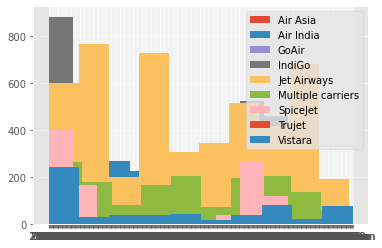

In [15]:
data.groupby("Airline")["Duration"].hist(legend=True)
plt.show()

It can be seen from the graph that the flight time of the airline Jet Airways is the most dominant

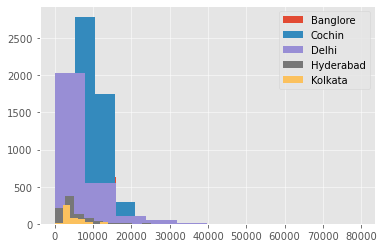

In [16]:
data.groupby("Destination")["Price"].hist(legend=True)
plt.show()

It can be seen from the graph that the destination to which they flew the most is Cochin and its price is not the highest

The most expensive ticket price is a Delhi

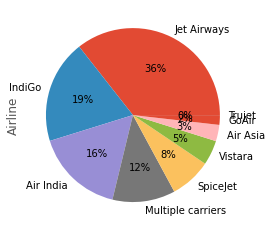

In [17]:
data["Airline"].value_counts().plot.pie(autopct="%1.0f%%")
plt.show()

From the graph it can be concluded that the most dominant airline is Jet Airways

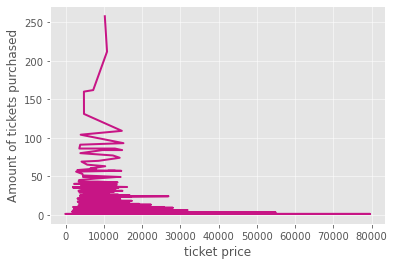

In [18]:
d=data["Price"].value_counts().plot(color='mediumvioletred')
d.set_ylabel("Amount of tickets purchased")
d.set_xlabel("ticket price")
plt.show()

It can be seen from the graph that the highest price per ticket is 8000 rupees

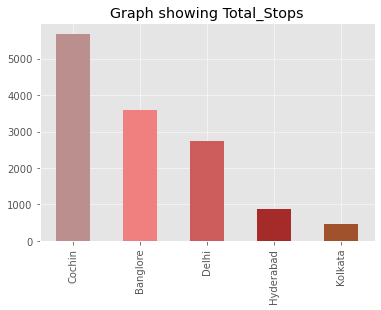

In [19]:
data['Destination'].value_counts().plot(kind="bar", color=["rosybrown", "lightcoral", "indianred", "brown", "sienna"],
                                          title="Graph showing Total_Stops")
plt.show()

It can be seen from the graph that the destination to which they flew the most according to the data is Cochin

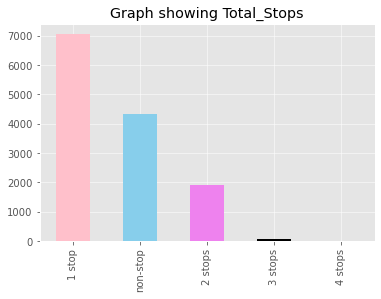

In [20]:
data['Total_Stops'].value_counts().plot(kind="bar", color=["pink", "skyblue", "violet", "black"],
                                          title="Graph showing Total_Stops")
plt.show()

It can be seen from the graph that the highest amount of stops is 4

we chose to use value_counts, an order from the big to the small - we made a plot for the value_counts and not the values themselves

## Separation of values

In [21]:
data['Duration'] = (pd.to_timedelta(data['Duration']).dt.seconds // 60).astype(int)

In [22]:
data['Total_Stops'] = data['Total_Stops'].replace({'non-stop':"0",
                                           '1 stop':"1",
                                           '2 stops':"2",
                                           '3 stops':"3",
                                           '4 stops':"4",
                            })

In [23]:
data['Date'] = data['Date'].apply(lambda name: name.split("/")[1]).astype(int)

In [24]:
data["Dep_Time"] = data["Dep_Time"].str.replace(":","").astype(int)

In [25]:
data["Arrival_Time"]=data["Arrival_Time"].apply(lambda x: x.split()[0].strip()).str.replace(":","").astype(int)

In [26]:
data.isna().sum()

Airline            0
Date               0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Binary variable, only true (1) or false (0) and when you make a sum only the unity is counted, only the truth

In [27]:
data.dropna(axis=0,inplace=True)

In [28]:
def Convert(string):
    ro = list(string.split(", "))
    return ro
data['Route'] = data['Route'].apply(Convert)

In [29]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

Text(0.5, 1.0, 'Route Stops')

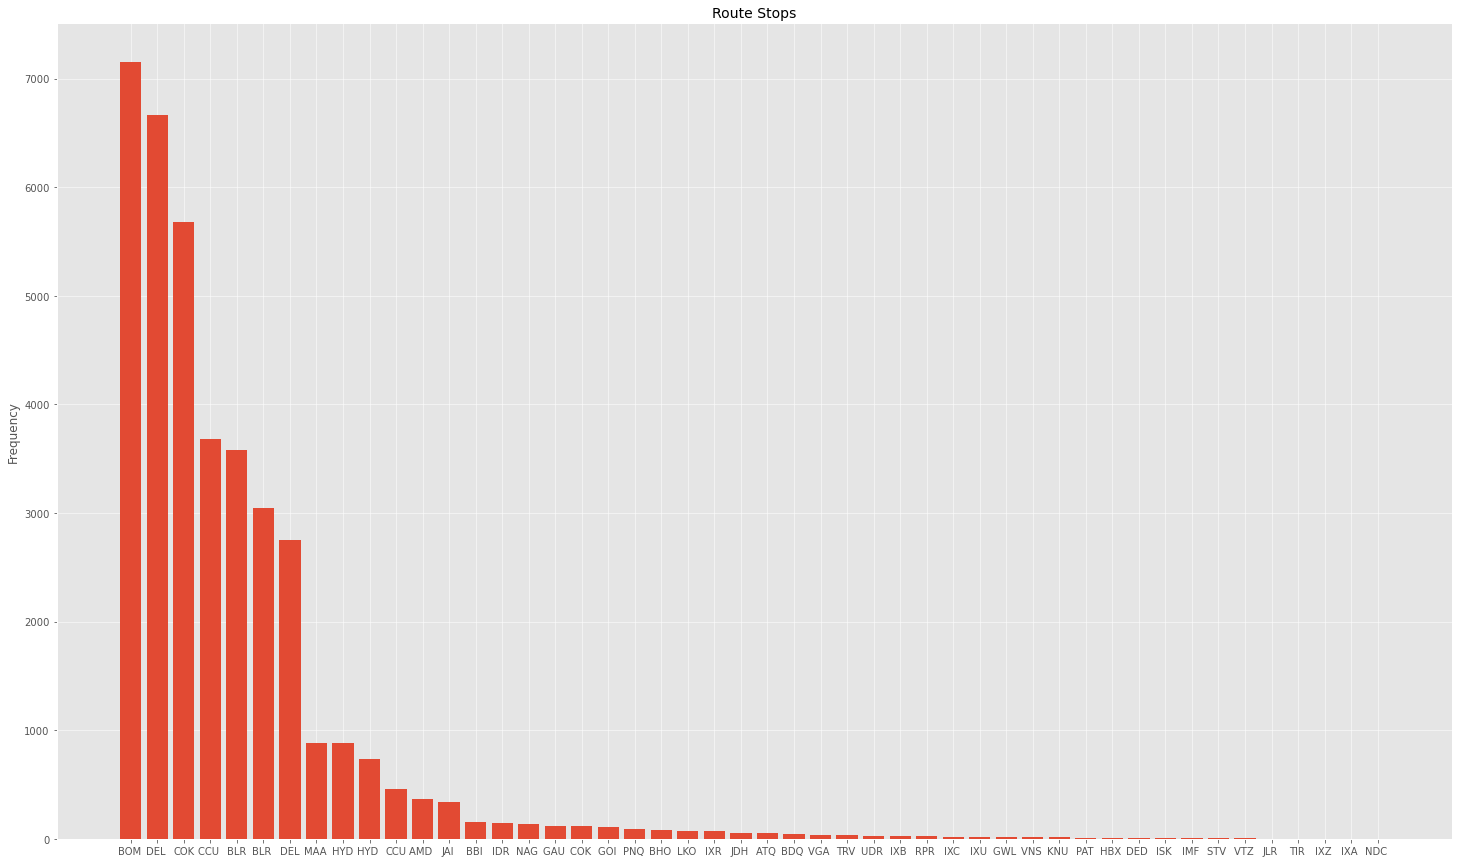

In [30]:
fig, ax = plt.subplots(figsize = (25,15))
ax.bar(to_1D(data["Route"]).value_counts().index,
        to_1D(data["Route"]).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Route Stops", size = 14)

The most dominant waypoints are

In [31]:
routes_expanded_v1 = data["Route"].apply(pd.Series)

In [32]:
data = pd.concat([data, routes_expanded_v1], axis=1)
data = data.drop(columns=['Route'])

We will delete the Route flight path and can not be worked as a number so that we can continue to use it and explore the questions

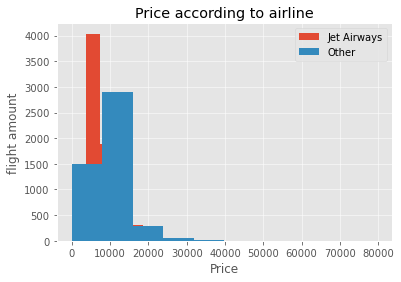

In [33]:
data.groupby(data["Airline"] == "Jet Airways")["Price"].hist()
plt.xlabel("Price")
plt.ylabel("flight amount")
plt.title("Price according to airline")
plt.legend(["Jet Airways", "Other"])

The price of a ticket according to the airline is around 1,000 rupees and there are other companies whose ticket price is more expensive compared to it

### Clustering Classification

In [34]:
new_data = data[["Airline", "Source", "Destination", "Price"]]

In [35]:
new_data = pd.get_dummies(new_data)

In Unsupervised Learning learning - it is mandatory to do a dynamic divorce for a categorical variable, because it works on distance - if everyone was isolated on their own the results would be different.

In Supervised Learning it is possible to do regular coding

In [36]:
scaler = MinMaxScaler()
new_data=pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)

In [37]:
data['Airline'] = data['Airline'].replace({'IndiGo':"1",
                                           'Air India':"2",
                                           'SpiceJet':"3",
                                           'Jet Airways':"4",
                                           'Multiple carriers':"5",
                                           'GoAir':"6",
                                           'Trujet':"7",
                                           'Vistara':"8",
                                           "Air Asia":"9",
                            })

In [38]:
data = pd.get_dummies(data, columns=["Source","Destination",0, 1, 2, 3, 4, 5])

In [39]:
data.loc[data["Price"] < 7000, "Price"] = 1
data.loc[(data["Price"] >= 7000) & (data["Price"] < 14000), "Price"] = 2
data.loc[data["Price"] >= 14000, "Price"] = 3

In [40]:
data["Date"] = pd.DatetimeIndex(data["Date"]).month

In [41]:
data = data.drop(columns=['Dep_Time','Arrival_Time','Additional_Info'])

In [42]:
x = data.drop(columns=["Price"])
y = data["Price"]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25)

In [44]:
print("Train", x_train.shape, "Test", x_test.shape)

Train (10014, 113) Test (3339, 113)


You want to predict the price- Divide it by function variables randomly

# IV. Modeling

In [45]:
measures = {
    "K": range(2, 11),
    "SSE": [],
    "SIL": []
}

for k in measures["K"]:
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(new_data)
    measures["SSE"].append(kmeans.inertia_)
    measures["SIL"].append(metrics.silhouette_score(new_data, kmeans.labels_))

<AxesSubplot:xlabel='K'>

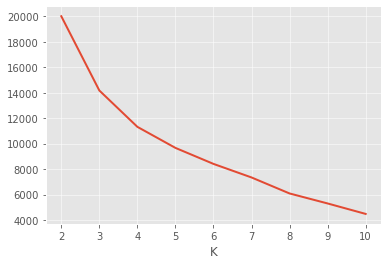

In [46]:
measures = pd.DataFrame(measures)
measures.set_index("K", inplace=True)
measures["SSE"].plot()

In [47]:
kmeans = KMeans(n_clusters=4, init="k-means++")
kmeans.fit(new_data)

KMeans(n_clusters=4)

In [48]:
Rf = RandomForestClassifier(n_estimators = 25)
Rf.fit(x_train,y_train)
Rf_pred = Rf.predict(x_test)


# V. Evaluation


In [49]:
metrics.confusion_matrix(y_test,Rf_pred)

array([[1181,  306,   45],
       [ 264, 1079,  108],
       [  27,  223,  106]], dtype=int64)

we reat this slant

<AxesSubplot:>

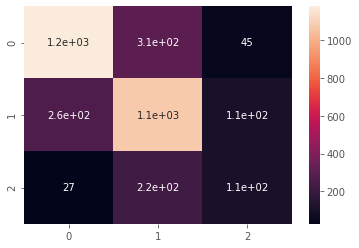

In [50]:
cm = metrics.confusion_matrix(y_test,Rf_pred )
sns.heatmap(cm, annot=True)

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, Rf_pred))

Accuracy: 0.7085953878406709


In [52]:
print("data The silhouette",metrics.silhouette_score(new_data, kmeans.labels_))

data The silhouette 0.5136801414733659


# Conclusions

According to our analyzes, it is possible to estimate the price of the ticket according to the most dominant airline and the most requested dates.

The leading airline is Jet Airways

Most tickets sell for between 1,000-2,000 rupees

The main work of obtaining non-numerical data is their conversion to Boolean variables so that we can analyze and process them

The group size we recommend according to the data analysis is 3